<a href="https://colab.research.google.com/github/RaghibMrz/Brain-Age-Prediction/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel as C
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
basePath = '/content/drive/MyDrive/FYP/'

def loadData(path):
  '''
    Returns loaded data as numpy array.

      Parameters:
        path (string): Text containting the path of the input string

      Returns:
        allData, testData (arr, arr): Two arrays, one containing all the internal data, one containing all the external (testing) data.
  '''

  # training data
  with open(basePath+'allData2.npy', 'rb') as f:
      allData = np.load(f)

  # testing data
  with open(basePath+'test_data.npy', 'rb') as f:
      testData = np.load(f)

  return allData, testData

allData, testData = loadData(basePath)

In [ ]:
# perform some sort of shuffling
np.random.shuffle(allData)
np.random.shuffle(testData)

In [ ]:
## initialising training data

# name = allData[:,0]

# features
X = allData[:,2:(allData.shape[1]-2)].astype(float)

# labels (ages)
Y = allData[:,1].astype(float)
print("Training data")
print("Mean: "+str(np.mean(Y)))
print("Std: "+str(np.std(Y)))

def getVariables(X, Y):
  '''
    Returns the required testing and training features and variables, all scaled appropriately. 
    Xtrain and Ytrain are the training features and labels respectively.
    Xtest and Ytest are the internal testing features and labels respectively.
    Xt and Yt are the external testing features and labels respectively.

      Parameters:
        X (arr): A two dimensional arrea containing n rows of segmented brain data, and m columns of features.
        Y (arr): An array containing the true biological ages of the brains in array X.

      Returns:
        Xtrain, Ytrain, Xtest, Ytest, Xt, Yt (arr, arr, arr, arr, arr , arr): All the variables required to perform analysis.
  '''
  # separate data into 80, 20 split- 80 training, 20 testing
  bound = (80*len(X)//100)
  Xtrain = X[:bound]
  Xtest = X[bound:]
  Ytrain = Y[:bound]
  Ytest = Y[bound:]

  ## initialising testing data
  name = testData[:,0]

  # features
  Xt = testData[:,2:(testData.shape[1])].astype(float)

  # labels (ages)
  Yt = testData[:,1].astype(float)

  # Apply feature scaling to all data
  sc = StandardScaler()
  Xtrain = sc.fit_transform(Xtrain)

  Xtest = sc.transform(Xtest)
  Xt = sc.transform(Xt)

  return Xtrain, Ytrain, Xtest, Ytest, Xt, Yt


Xtrain, Ytrain, Xtest, Ytest, Xt, Yt = getVariables(X, Y)

print("\nTesting data")
print("Mean: "+str(np.mean(Yt)))
print("Std: "+str(np.std(Yt)))

Training data
Mean: 40.227000253356984
Std: 21.317287768657526

Testing data
Mean: 54.166666666666664
Std: 18.553725791353628


# Auxilliary Functions

In [ ]:
def getMetrics(model, pred, Ytest):
  '''
    Prints out a table with a few calculated metrics: MAE, MSE, explained variance,
    R^2 value, and spearman's rank correlation coefficient. Also displays graph showing predicted ages 
    against actual biological ages; this should be a perfectly straight y=x line.

      Parameters:
        model (str): A string indicating which model is being compared.
        pred (arr): An array containing the ages predicted by 'model'.
        Ytest (arr): An array containing the true biological ages.

      Returns:
        None
  '''
  # Create a metrics dataframe for all of our models
  metrics = pd.DataFrame(index=['MAE', 'MSE', 'R^2', 'Spearmans'], columns=[])

  metrics[model] = [
      mae(y_pred=pred, y_true=Ytest),
      mse(y_pred=pred, y_true=Ytest),
      r(y_pred=pred, y_true=Ytest),
      spearmanr(pred, Ytest)
  ]
  print(metrics[model].to_markdown())

  # print graph of predicted age against actual age
  ##!! draw lobf
  plt.scatter(Ytest, pred)
  plt.title(model+" scatter plot of actual and predicted ages")
  plt.xlabel("Actual age")
  plt.ylabel("Predicted age")

  perf_x = np.linspace(np.min(Ytest), np.max(Ytest), len(Ytest))
  perf_y = perf_x
  plt.plot(perf_x, perf_y, '-r', label='Line of best fit')

  plt.show()

# Without PCA

### Neural Network

Epoch 1/40
79/79 [==============================] - 1s 4ms/step - loss: 36.0177 - val_loss: 21.2517
Epoch 2/40
79/79 [==============================] - 0s 3ms/step - loss: 19.3979 - val_loss: 10.6806
Epoch 3/40
79/79 [==============================] - 0s 3ms/step - loss: 8.3685 - val_loss: 6.6945
Epoch 4/40
79/79 [==============================] - 0s 2ms/step - loss: 6.2985 - val_loss: 6.3275
Epoch 5/40
79/79 [==============================] - 0s 3ms/step - loss: 6.0693 - val_loss: 6.1273
Epoch 6/40
79/79 [==============================] - 0s 2ms/step - loss: 5.8076 - val_loss: 5.7652
Epoch 7/40
79/79 [==============================] - 0s 3ms/step - loss: 5.5001 - val_loss: 5.5931
Epoch 8/40
79/79 [==============================] - 0s 2ms/step - loss: 5.3369 - val_loss: 5.3270
Epoch 9/40
79/79 [==============================] - 0s 3ms/step - loss: 5.2240 - val_loss: 5.0783
Epoch 10/40
79/79 [==============================] - 0s 3ms/step - loss: 4.9664 - val_loss: 5.1384
Epoch 11/40
79/

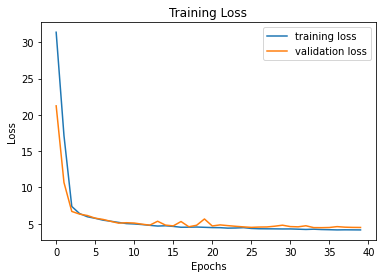

Internal Testing Data: 
|           | Neural Network (Internal Testing)                                             |
|:----------|:------------------------------------------------------------------------------|
| MAE       | 4.582932539638085                                                             |
| MSE       | 41.49969572955012                                                             |
| R^2       | 0.9094380172134536                                                            |
| Spearmans | SpearmanrResult(correlation=0.9135640364212005, pvalue=3.94873195416206e-310) |


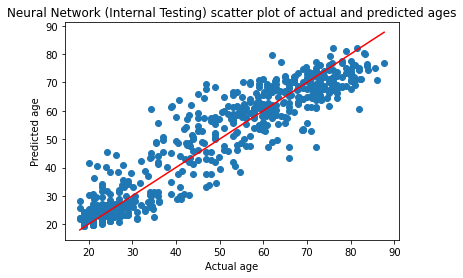


 External Testing Data: 
|           | Neural Network (Testing)                                                       |
|:----------|:-------------------------------------------------------------------------------|
| MAE       | 6.403288099500868                                                              |
| MSE       | 65.26117401533587                                                              |
| R^2       | 0.8104199582103321                                                             |
| Spearmans | SpearmanrResult(correlation=0.9178688929924382, pvalue=1.863112033923944e-261) |


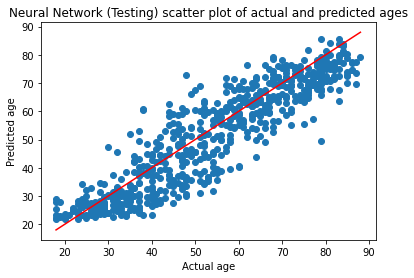

In [ ]:
"""
Initialising an Aritificial Neural Network
"""
ann = tf.keras.models.Sequential()
# input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=512, activation='elu', input_shape=(Xtrain.shape[1],)))
# second hidden layer
ann.add(tf.keras.layers.Dense(units=256, activation='elu'))
# third hidden layer
ann.add(tf.keras.layers.Dense(units=128, activation='elu'))
# output layer
ann.add(tf.keras.layers.Dense(units=1, activation='gelu'))

"""
Training
"""
# Compiling the ANN
ann.compile(optimizer=tf.optimizers.SGD(lr=1e-3, momentum=0.9, nesterov=True), loss='mean_absolute_error')

# Training ANN on the training set
history = ann.fit(Xtrain, Ytrain, batch_size=32, epochs=40, validation_split=0.2)

# Plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Internal Testing Data: ")
pred = ann.predict(Xtest)
metrics = getMetrics("Neural Network (Internal Testing)", pred, Ytest)

print("\n External Testing Data: ")
test_pred = ann.predict(Xt)
metrics = getMetrics("Neural Network (External Testing)", test_pred, Yt)

### Gradient Boosting

Training loss: 
|           | Gradient Boosting (Internal Testing)                                           |
|:----------|:-------------------------------------------------------------------------------|
| MAE       | 5.498741420069828                                                              |
| MSE       | 57.97105547441209                                                              |
| R^2       | 0.8734936814427448                                                             |
| Spearmans | SpearmanrResult(correlation=0.8979329923964384, pvalue=4.402190025523017e-283) |


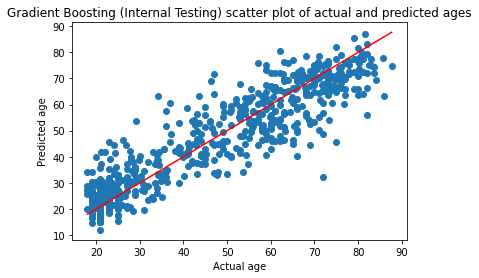


 Validation loss: 
|           | Gradient Boosting (External Testing)                                            |
|:----------|:--------------------------------------------------------------------------------|
| MAE       | 6.869884155414723                                                               |
| MSE       | 78.36289029374971                                                               |
| R^2       | 0.7723602089481691                                                              |
| Spearmans | SpearmanrResult(correlation=0.8856053053438575, pvalue=2.4262601949186456e-217) |


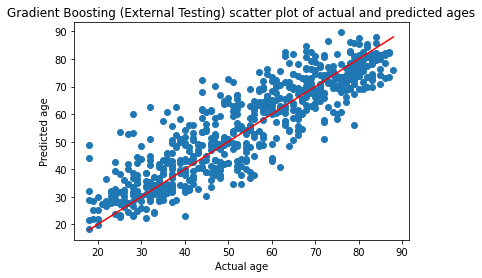

In [ ]:
regressor = XGBRegressor(objective='reg:squarederror', n_estimators=512, eval_metric='mae')
regressor.fit(Xtrain, Ytrain)

print("Training loss: ")
pred = regressor.predict(Xtest)
metrics = getMetrics("Gradient Boosting (Internal Testing)", pred, Ytest)

print("\n Validation loss: ")
test_pred = regressor.predict(Xt)
metrics = getMetrics("Gradient Boosting (External Testing)", test_pred, Yt)

### Support Vector Regression

Training loss: 
|           | Support Vector (Internal Testing)                                               |
|:----------|:--------------------------------------------------------------------------------|
| MAE       | 5.970416131856987                                                               |
| MSE       | 64.80653917233214                                                               |
| R^2       | 0.8585770670891614                                                              |
| Spearmans | SpearmanrResult(correlation=0.8910282825090302, pvalue=1.6755686365214084e-272) |


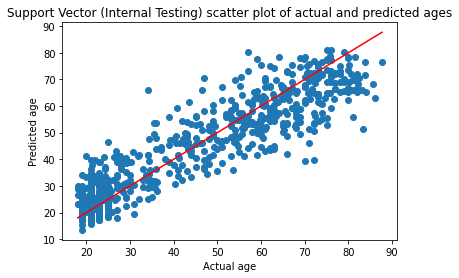


 Validation loss: 
|           | Support Vector (External Testing)                                              |
|:----------|:-------------------------------------------------------------------------------|
| MAE       | 10.261360805592759                                                             |
| MSE       | 150.28482325154434                                                             |
| R^2       | 0.5634310368721612                                                             |
| Spearmans | SpearmanrResult(correlation=0.8789861891479018, pvalue=6.102115207516983e-210) |


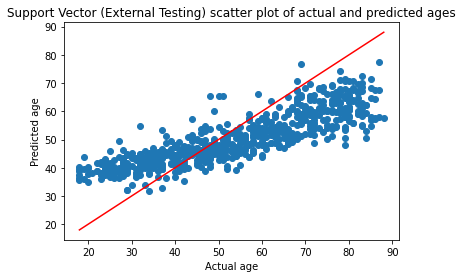

In [ ]:
regressor = SVR(kernel="rbf")
regressor.fit(Xtrain, Ytrain)

print("Training loss: ")
pred = regressor.predict(Xtest)
metrics = getMetrics("Support Vector (Internal Testing)", pred, Ytest)

print("\n Validation loss: ")
test_pred = regressor.predict(Xt)
metrics = getMetrics("Support Vector (External Testing)", test_pred, Yt)

### Random Forest

Training loss: 
|           | Random Forest (Internal Testing)                                                |
|:----------|:--------------------------------------------------------------------------------|
| MAE       | 5.617907288370253                                                               |
| MSE       | 60.62667489540391                                                               |
| R^2       | 0.8676985025609818                                                              |
| Spearmans | SpearmanrResult(correlation=0.8915262785536681, pvalue=3.0563941523075318e-273) |


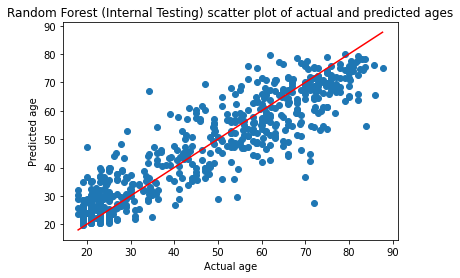


 Validation loss: 
|           | Random Forest (External Testing)                                                |
|:----------|:--------------------------------------------------------------------------------|
| MAE       | 7.4762824918016975                                                              |
| MSE       | 89.00298568548273                                                               |
| R^2       | 0.7414513299792314                                                              |
| Spearmans | SpearmanrResult(correlation=0.8697789286076278, pvalue=2.4396869878151752e-200) |


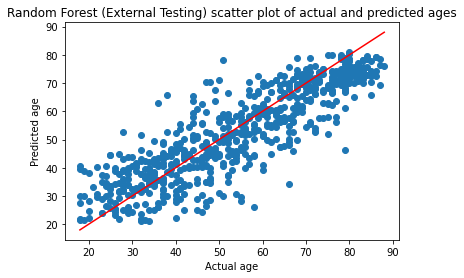

In [ ]:
regressor = RandomForestRegressor(n_estimators=256, criterion='mae')
regressor.fit(Xtrain, Ytrain)

print("Training loss: ")
pred = regressor.predict(Xtest)
metrics = getMetrics("Random Forest (Internal Testing)", pred, Ytest)

print("\n Validation loss: ")
test_pred = regressor.predict(Xt)
metrics = getMetrics("Random Forest (External Testing)", test_pred, Yt)

### Gaussian Processes Regression

Training loss: 
|           | Gaussian Processes (Internal Testing)                                          |
|:----------|:-------------------------------------------------------------------------------|
| MAE       | 5.016061295348823                                                              |
| MSE       | 44.84124548434009                                                              |
| R^2       | 0.9045965177916451                                                             |
| Spearmans | SpearmanrResult(correlation=0.9023122498609615, pvalue=3.404789278835889e-290) |


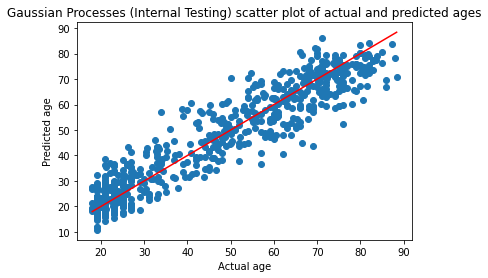


 Validation loss: 
|           | Gaussian Processes (External Testing)                                          |
|:----------|:-------------------------------------------------------------------------------|
| MAE       | 8.353291303969371                                                              |
| MSE       | 108.97422698754886                                                             |
| R^2       | 0.6834359967008641                                                             |
| Spearmans | SpearmanrResult(correlation=0.8769912356486261, pvalue=8.533174724805313e-208) |


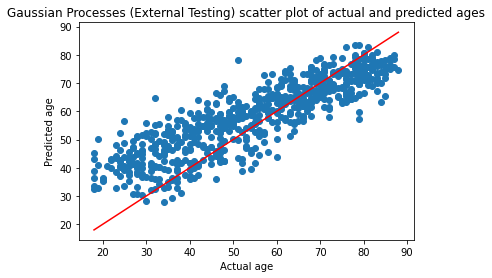

In [ ]:
kernel = C(1.0, (1e-1, 1e3)) + C(5.0, (1e-1, 1e3)) * RBF(10.0, (1e-3, 1e3)) + WhiteKernel(5.0, (1e-3, 1e3))
gaussian = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian.fit(Xtrain, Ytrain)

print("Training loss: ")
pred = gaussian.predict(Xtest)
metrics = getMetrics("Gaussian Processes (Internal Testing)", pred, Ytest)

print("\n Validation loss: ")
test_pred = gaussian.predict(Xt)
metrics = getMetrics("Gaussian Processes (External Testing)", test_pred, Yt)

# PCA

0.99 of the variation in data is explained by 25 components
0.95 of the variation in data is explained by 16 components


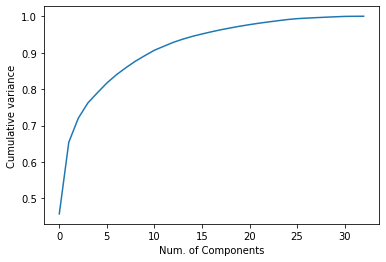

In [ ]:
# shows how many components are required to explain percentage% of variance in data.
percentage = 0.99
PCA_X = PCA(percentage).fit(Xtrain)
print(str(percentage)+" of the variation in data is explained by "+str(PCA_X.n_components_)+" components")
percentage = 0.95
PCA_X = PCA(percentage).fit(Xtrain)
print(str(percentage)+" of the variation in data is explained by "+str(PCA_X.n_components_)+" components")

PCAvar = PCA().fit(Xtrain)

# plot graph of number of variance against cumulative variance
plt.plot(np.cumsum(PCAvar.explained_variance_ratio_))
plt.xlabel('Num. of Components')
plt.ylabel('Cumulative variance')

def getPCAData(i, Xtrain, Xtest):
  sklearn_PCA = PCA(n_components=i)
  PCAvar.fit(Xtrain)
  Xtrain_PCA = PCAvar.transform(Xtrain)
  Xtest_PCA = PCAvar.transform(Xtest)
  return Xtrain_PCA[:,:i], Xtest_PCA[:,:i]

PCAtrain, PCAtest = getPCAData(16, Xtrain, Xtest)

PCA_t = getPCAData(16, Xtrain, Xt)[1]

# Apply feature scaling to the data
PCA_sc = StandardScaler()
PCAtrain = PCA_sc.fit_transform(PCAtrain)
PCAtest = PCA_sc.transform(PCAtest)
PCA_t = PCA_sc.transform(PCA_t)

### Neural Network

Epoch 1/40
89/89 [==============================] - 1s 3ms/step - loss: 38.5143 - val_loss: 17.5596
Epoch 2/40
89/89 [==============================] - 0s 2ms/step - loss: 9.9505 - val_loss: 7.2860
Epoch 3/40
89/89 [==============================] - 0s 2ms/step - loss: 6.9551 - val_loss: 7.0830
Epoch 4/40
89/89 [==============================] - 0s 2ms/step - loss: 6.7292 - val_loss: 7.4388
Epoch 5/40
89/89 [==============================] - 0s 2ms/step - loss: 6.7115 - val_loss: 6.6751
Epoch 6/40
89/89 [==============================] - 0s 3ms/step - loss: 6.2962 - val_loss: 6.3309
Epoch 7/40
89/89 [==============================] - 0s 3ms/step - loss: 5.8457 - val_loss: 6.2244
Epoch 8/40
89/89 [==============================] - 0s 3ms/step - loss: 5.8197 - val_loss: 6.1444
Epoch 9/40
89/89 [==============================] - 0s 3ms/step - loss: 5.6522 - val_loss: 5.9232
Epoch 10/40
89/89 [==============================] - 0s 2ms/step - loss: 5.6770 - val_loss: 5.7342
Epoch 11/40
89/89

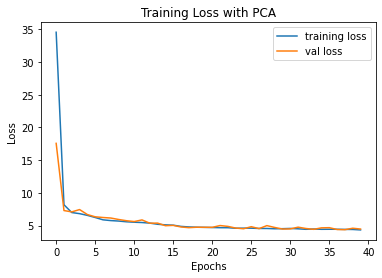

Training loss: 
|           | Neural Network (+PCA) (Internal Testing)                                        |
|:----------|:--------------------------------------------------------------------------------|
| MAE       | 4.8509450272185894                                                              |
| MSE       | 49.85726484344954                                                               |
| R^2       | 0.891199858669766                                                               |
| Spearmans | SpearmanrResult(correlation=0.9018679336715874, pvalue=1.8571299583355361e-289) |


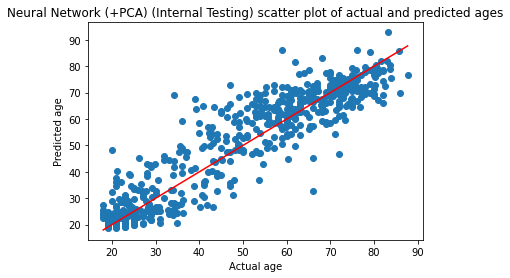


 Validation loss: 
|           | Neural Network (+PCA) (External Testing)                                        |
|:----------|:--------------------------------------------------------------------------------|
| MAE       | 6.55384561161936                                                                |
| MSE       | 70.69037360348153                                                               |
| R^2       | 0.7946484386148797                                                              |
| Spearmans | SpearmanrResult(correlation=0.9107345694748095, pvalue=2.7261514593607378e-250) |


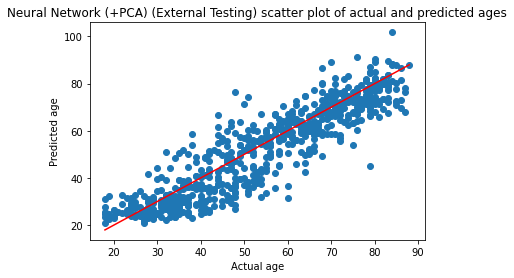

In [ ]:
pca_ann = tf.keras.models.Sequential()
# Add input layer and first hidden layer
pca_ann.add(tf.keras.layers.Dense(units=512, activation='elu', input_shape=(PCAtrain.shape[1],)))
# Add second hidden layer
pca_ann.add(tf.keras.layers.Dense(units=256, activation='elu'))
# Add third hidden layer
pca_ann.add(tf.keras.layers.Dense(units=128, activation='elu'))
# Add output layer
pca_ann.add(tf.keras.layers.Dense(units=1, activation='gelu'))

# Compiling the ANN
pca_ann.compile(optimizer=tf.optimizers.SGD(lr=1e-3, momentum=0.9, nesterov=True), loss='mean_absolute_error')

# Training the ANN on the training set
history = pca_ann.fit(PCAtrain, Ytrain, batch_size=32, epochs=40, validation_split=0.1)

# Plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training Loss with PCA')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Training loss: ")
pred = pca_ann.predict(PCAtest)
metrics = getMetrics("Neural Network (+PCA) (Internal Testing)", pred, Ytest)

print("\n Validation loss: ")
test_pred = pca_ann.predict(PCA_t)
metrics = getMetrics("Neural Network (+PCA) (External Testing)", test_pred, Yt)

### Gradient Boosting

Training loss: 
|           | Gradient Boosting (+PCA) (Internal Testing)                                    |
|:----------|:-------------------------------------------------------------------------------|
| MAE       | 6.088286460635028                                                              |
| MSE       | 68.54551255278416                                                              |
| R^2       | 0.8504177580396075                                                             |
| Spearmans | SpearmanrResult(correlation=0.8809515464336845, pvalue=2.807805899233552e-258) |


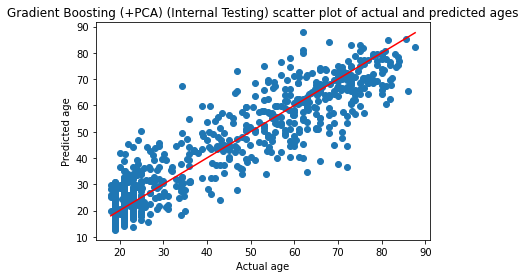


 Validation loss: 
|           | Gradient Boosting (+PCA) (External Testing)                                    |
|:----------|:-------------------------------------------------------------------------------|
| MAE       | 8.865614186098545                                                              |
| MSE       | 127.53614510182935                                                             |
| R^2       | 0.6295146680564427                                                             |
| Spearmans | SpearmanrResult(correlation=0.8324019948540354, pvalue=9.344739319803087e-168) |


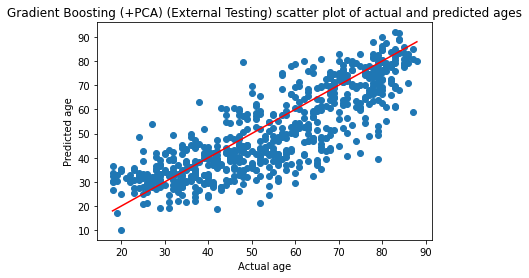

In [ ]:
classifier = XGBRegressor(objective='reg:squarederror', n_estimators=512, eval_metric='mae')
classifier.fit(PCAtrain, Ytrain)

print("Training loss: ")
pred = classifier.predict(PCAtest)
metrics = getMetrics("Gradient Boosting (+PCA) (Internal Testing)", pred, Ytest)

print("\n Validation loss: ")
test_pred = classifier.predict(PCA_t)
metrics = getMetrics("Gradient Boosting (+PCA) (External Testing)", test_pred, Yt)

### Support Vector Machine

Training loss: 
|           | Support Vector (+PCA) (Internal Testing)                                       |
|:----------|:-------------------------------------------------------------------------------|
| MAE       | 8.10563101182353                                                               |
| MSE       | 111.85659087789274                                                             |
| R^2       | 0.7523551403704848                                                             |
| Spearmans | SpearmanrResult(correlation=0.8542837726429988, pvalue=4.029726471333053e-226) |


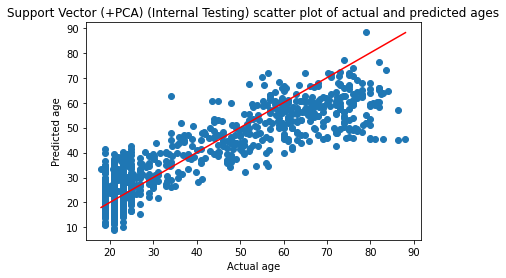


 Validation loss: 
|           | Support Vector (+PCA) (External Testing)                                       |
|:----------|:-------------------------------------------------------------------------------|
| MAE       | 14.994290374214893                                                             |
| MSE       | 315.04780871522087                                                             |
| R^2       | 0.08480382642304984                                                            |
| Spearmans | SpearmanrResult(correlation=0.7767388070368404, pvalue=7.962272038669185e-132) |


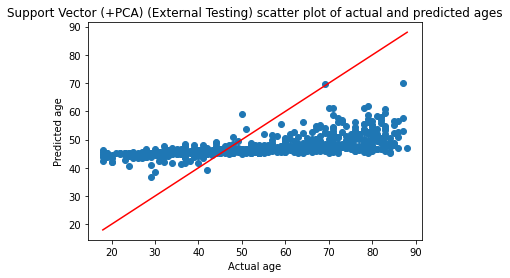

In [ ]:
regressor = SVR(kernel="rbf")
regressor.fit(PCAtrain, Ytrain)

print("Training loss: ")
pred = regressor.predict(PCAtest)
metrics = getMetrics("Support Vector (+PCA) (Internal Testing)", pred, Ytest)

print("\n Validation loss: ")
test_pred = regressor.predict(PCA_t)
metrics = getMetrics("Support Vector (+PCA) (External Testing)", test_pred, Yt)

### Random Forest

Training loss: 
|           | Random Forest (+PCA) (Training)                                                 |
|:----------|:--------------------------------------------------------------------------------|
| MAE       | 6.081934236550634                                                               |
| MSE       | 75.65443794339723                                                               |
| R^2       | 0.8349044303503849                                                              |
| Spearmans | SpearmanrResult(correlation=0.8763187287657762, pvalue=3.6414082515897205e-252) |


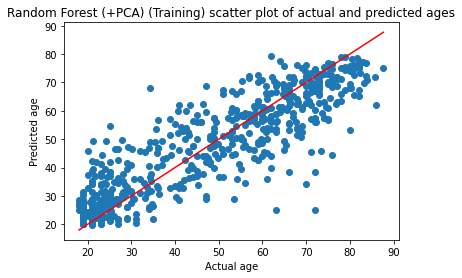


 Validation loss: 
|           | Random Forest (+PCA) (Testing)                                                  |
|:----------|:--------------------------------------------------------------------------------|
| MAE       | 9.446610906153547                                                               |
| MSE       | 139.52405789477257                                                              |
| R^2       | 0.5946904553059488                                                              |
| Spearmans | SpearmanrResult(correlation=0.7967642745157273, pvalue=1.9036389551890085e-143) |


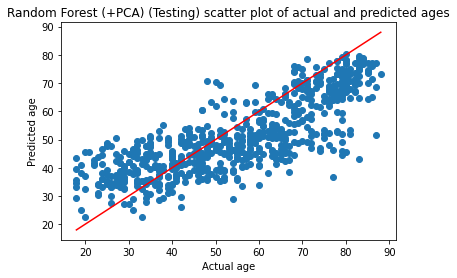

In [ ]:
regressor = RandomForestRegressor(n_estimators=256)
regressor.fit(PCAtrain, Ytrain)

print("Training loss: ")
pred = regressor.predict(PCAtest)
metrics = getMetrics("Random Forest (+PCA) (Training)", pred, Ytest)

print("\n Validation loss: ")
test_pred = regressor.predict(PCA_t)
metrics = getMetrics("Random Forest (+PCA) (Testing)", test_pred, Yt)

### Gaussian Processes Regression

Training loss: 
|           | Gaussian Processes (+PCA) (Internal Testing)                                |
|:----------|:----------------------------------------------------------------------------|
| MAE       | 6.284074853421899                                                           |
| MSE       | 63.48337192426641                                                           |
| R^2       | 0.8649338420803174                                                          |
| Spearmans | SpearmanrResult(correlation=0.887955157088442, pvalue=5.0829774601832e-268) |


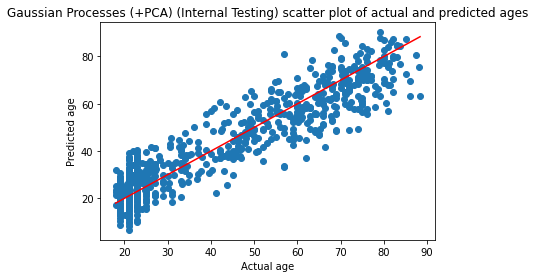


 Validation loss: 
|           | Gaussian Processes (+PCA) (External Testing)                                    |
|:----------|:--------------------------------------------------------------------------------|
| MAE       | 7.965436332471783                                                               |
| MSE       | 96.69245580489795                                                               |
| R^2       | 0.7191138515539035                                                              |
| Spearmans | SpearmanrResult(correlation=0.8828952235276191, pvalue=2.9444467073910557e-214) |


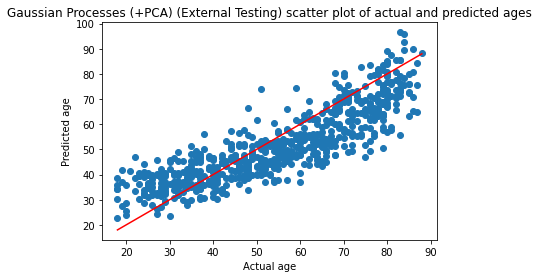

In [ ]:
kernel = C(1.0, (1e-1, 1e3)) + C(5.0, (1e-1, 1e3)) * RBF(10.0, (1e-3, 1e3)) + WhiteKernel(5.0, (1e-3, 1e3))
gaussian = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian.fit(PCAtrain, Ytrain)

print("Training loss: ")
pred = gaussian.predict(PCAtest)
metrics = getMetrics("Gaussian Processes (+PCA) (Internal Testing)", pred, Ytest)

print("\n Validation loss: ")
test_pred = gaussian.predict(PCA_t)
metrics = getMetrics("Gaussian Processes (+PCA) (External Testing)", test_pred, Yt)

# Finding best Hyperparameters

### Neural Network

In [ ]:
his = []

for i in range(100):
  print("\n\nEPOCH "+str(i))

  # perform some sort of shuffling
  np.random.shuffle(allData)
  # features
  X = allData[:,2:(allData.shape[1]-2)].astype(float)
  # labels (ages)
  Y = allData[:,1].astype(float)

  Xtrain, Ytrain, Xtest, Ytest, Xt, Yt = getVariables(X, Y)

  ann = tf.keras.models.Sequential()
  # Add input layer and first hidden layer
  ann.add(tf.keras.layers.Dense(units=512, activation='elu', input_shape=(Xtrain.shape[1],)))
  # Add second hidden layer
  ann.add(tf.keras.layers.Dense(units=256, activation='elu'))
  # Add third hidden layer
  ann.add(tf.keras.layers.Dense(units=128, activation='elu'))
  # Add output layer
  ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

  # Compiling the ANN
  ann.compile(optimizer=tf.optimizers.SGD(lr=1e-3, momentum=0.9, nesterov=True), loss='mean_absolute_error')

  # Training the ANN on the training set
  history = ann.fit(Xtrain, Ytrain, batch_size=64, epochs=40, validation_split=0.2)

  pred = ann.predict(Xtest)
  his.append(mae(pred, Ytest))

print(np.mean(his))

Streaming output truncated to the last 5000 lines.
40/40 [==============================] - 0s 3ms/step - loss: 4.2719 - val_loss: 4.7545
Epoch 32/40
40/40 [==============================] - 0s 3ms/step - loss: 4.3532 - val_loss: 4.8324
Epoch 33/40
40/40 [==============================] - 0s 4ms/step - loss: 4.0939 - val_loss: 4.9801
Epoch 34/40
40/40 [==============================] - 0s 4ms/step - loss: 4.2865 - val_loss: 4.6823
Epoch 35/40
40/40 [==============================] - 0s 3ms/step - loss: 4.1349 - val_loss: 4.7577
Epoch 36/40
40/40 [==============================] - 0s 4ms/step - loss: 4.2079 - val_loss: 4.7162
Epoch 37/40
40/40 [==============================] - 0s 3ms/step - loss: 4.1534 - val_loss: 4.8343
Epoch 38/40
40/40 [==============================] - 0s 3ms/step - loss: 4.0891 - val_loss: 4.8007
Epoch 39/40
40/40 [==============================] - 0s 3ms/step - loss: 4.0322 - val_loss: 4.6880
Epoch 40/40
40/40 [==============================] - 0s 3ms/step - los

### Gradient Boosting

In [ ]:
estimators = [256, 512, 1024]
means = []
his = []

for n in estimators:
  for i in range(100):
    print("\n\nEPOCH "+str(i))

    # perform some sort of shuffling
    np.random.shuffle(allData)
    # features
    X = allData[:,2:(allData.shape[1]-2)].astype(float)
    # labels (ages)
    Y = allData[:,1].astype(float)

    Xtrain, Ytrain, Xtest, Ytest, Xt, Yt = getVariables(X, Y)

    regressor = XGBRegressor(objective='reg:squarederror', n_estimators=n, eval_metric='mae')
    regressor.fit(Xtrain, Ytrain)

    pred = regressor.predict(Xtest)
    loss = mae(pred, Ytest)
    print(loss)
    his.append(loss)
  means.append(np.mean(his))

print(means)



EPOCH 0
5.727534819349458


EPOCH 1
5.435597389124617


EPOCH 2
5.34517618058603


EPOCH 3
5.523508831458757


EPOCH 4
5.37633663810054


EPOCH 5
5.179850200653076


EPOCH 6
5.3984675137000755


EPOCH 7
5.603067595518088


EPOCH 8
5.3122616623504255


EPOCH 9
5.234626878569398


EPOCH 10
5.274005696067328


EPOCH 11
5.532008593595481


EPOCH 12
5.347442889539502


EPOCH 13
5.481206353441069


EPOCH 14
5.564017507335808


EPOCH 15
5.327963905624196


EPOCH 16
5.313269087199924


EPOCH 17
5.588484438208085


EPOCH 18
5.637846180541605


EPOCH 19
5.837700666258606


EPOCH 20
5.562459968615181


EPOCH 21
5.430975975084909


EPOCH 22
5.350057687735256


EPOCH 23
5.284466379141507


EPOCH 24
5.594420304455334


EPOCH 25
5.339501520663878


EPOCH 26
5.571230012434947


EPOCH 27
5.392527604066872


EPOCH 28
5.721237197296529


EPOCH 29
5.30178387967846


EPOCH 30
5.541864295718035


EPOCH 31
5.38876002671447


EPOCH 32
5.4537334386608265


EPOCH 33
5.317819282290302


EPOCH 34
5.658361004213

### Random Forest Regression

In [ ]:
estimators = [64, 128, 256]
means = []
his = []

for n in estimators:
  for i in range(10):
    print("\n\nEPOCH "+str(i))

    # perform some sort of shuffling
    np.random.shuffle(allData)
    # features
    X = allData[:,2:(allData.shape[1]-2)].astype(float)
    # labels (ages)
    Y = allData[:,1].astype(float)

    Xtrain, Ytrain, Xtest, Ytest, Xt, Yt = getVariables(X, Y)

    regressor = RandomForestRegressor(n_estimators=n, criterion='mae')
    regressor.fit(Xtrain, Ytrain)

    pred = regressor.predict(Xtest)
    loss = mae(pred, Ytest)
    print(loss)
    his.append(loss)
  means.append(np.mean(his))

print(means)



EPOCH 0
5.722957476265823


EPOCH 1
5.773504944620253


EPOCH 2
5.357157140031646


EPOCH 3
5.437229034810127


EPOCH 4
5.610820411392404


EPOCH 5
5.823198575949368


EPOCH 6
5.946907535601266


EPOCH 7
5.918081685126581


EPOCH 8
5.728439675632912


EPOCH 9
5.493291831487342


EPOCH 0
5.822130982990506


EPOCH 1
5.680566851265823


EPOCH 2
5.491591129351266


EPOCH 3
5.433722211234177


EPOCH 4
5.9319413073575955


EPOCH 5
5.690653085443038


EPOCH 6
5.507667177610759


EPOCH 7
5.755285304588607


EPOCH 8
5.581982693829115


EPOCH 9
5.597969491693038


EPOCH 0
5.506697290348101


EPOCH 1
5.572958440466773


EPOCH 2
5.59168379153481


EPOCH 3
5.3853108188291126


EPOCH 4
5.791092859968352


EPOCH 5
5.223922938093353


EPOCH 6
5.616614467958861


EPOCH 7
5.560418611550632


EPOCH 8
5.6234799742879735


EPOCH 9
5.592399327531645
[5.681158831091772, 5.665254927314082, 5.625655902228376]


### Saving best overall model- Neural Network

In [ ]:
ann.save('/content/drive/MyDrive/FYP/model.h5')
# also need the scaler to scale any tested data by same amount as training data
pickle.dump(sc, open('/content/drive/MyDrive/FYP/scaler.pkl','wb'))

# # Xtrain
# with open('/content/drive/MyDrive/FYP/Xtrain.npy', 'wb') as f:
#     np.save(f, Xtrain)

# # Xtest
# with open('/content/drive/MyDrive/FYP/Xtest.npy', 'wb') as f:
#     np.save(f, Xtest)

# # Ytrain
# with open('/content/drive/MyDrive/FYP/Ytrain.npy', 'wb') as f:
#     np.save(f, Ytrain)

# # Ytest
# with open('/content/drive/MyDrive/FYP/Ytest.npy', 'wb') as f:
#     np.save(f, Ytest)